# Import and examine global Corona virus data from the World Health Organization (WHO)

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import case & death data
cases_deaths_url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
df = pd.read_csv(cases_deaths_url)

In [4]:
# Check size of dataframe (rows, columns)
df.shape

(241740, 8)

In [15]:
# Check data type of each column
df.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

In [16]:
# Change Date_reported column to datetime data type
df.Date_reported = pd.to_datetime(df.Date_reported, format="%Y-%m-%d")
# Change object dtypes to strings
df[['Country_code', 'Country', 'WHO_region']] = df[['Country_code', 'Country', 'WHO_region']].astype('string')

In [17]:
# Verify new dtypes
df.dtypes

Date_reported        datetime64[ns]
Country_code                 string
Country                      string
WHO_region                   string
New_cases                     int64
Cumulative_cases              int64
New_deaths                    int64
Cumulative_deaths             int64
dtype: object

In [18]:
# Examine 1st 5 rows
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [19]:
# Examine total cases by WHO region
df.groupby(df.WHO_region).New_cases.sum()

WHO_region
AFRO       9347002
AMRO     179037870
EMRO      23124739
EURO     258122220
Other          764
SEARO     60379520
WPRO      91785018
Name: New_cases, dtype: int64

In [20]:
# Examine global cases total
df.New_cases.sum()

621797133

In [21]:
# Verify daily cases sum total matches cumulative total
df.loc[df.Date_reported == max(df.Date_reported), 'Cumulative_cases'].sum()

621797133

In [22]:
# Examine US cases total
df[df.Country_code == 'US'].New_cases.sum()

95529652

In [23]:
# Verify US daily cases sum total matches US cumulative total
df[df.Country_code == 'US'].Cumulative_cases.max()

95529652

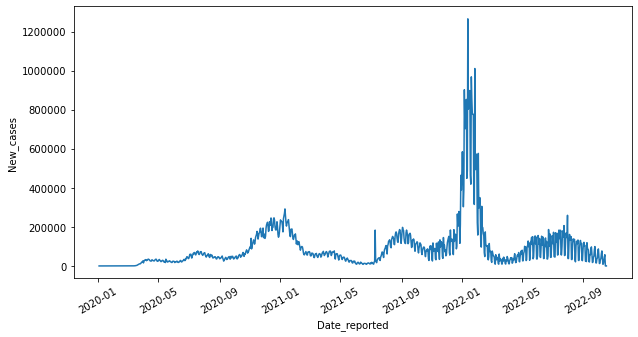

In [24]:
# Create filtered dataframe for US only
us = df.loc[df.Country_code == 'US', ['Date_reported', 'New_cases']]

# Plot cases by date for the US
plt.figure(figsize=(10, 5))
#plt.plot(df.Date_reported, df.New_cases)
sns.lineplot(data=us, x="Date_reported", y="New_cases")
plt.xticks(rotation= 30)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [3]:
# Output cleaned file to csv
df.to_csv("global_data.csv", index=False)